In [1]:
from BoundaryProblem import BoundaryProblem
from PlotSolutions import PlotSolutions

In [2]:
boundary_solver = BoundaryProblem()
mesh, u, h = boundary_solver.solve_problem('pow(x[0], 2) + pow(x[1], 2)', '2.0*pow(x[0], 2)/R + 2.0*pow(x[1], 2)/R', '-4.0 + alfa*(pow(x[0], 2) + pow(x[1], 2))', 'u1', \
                             '$x^{2}+y^{2}$')

L2-error =  0.0042980561041566666
C-error =  0.005925704344411975


In [3]:
plotter = PlotSolutions()

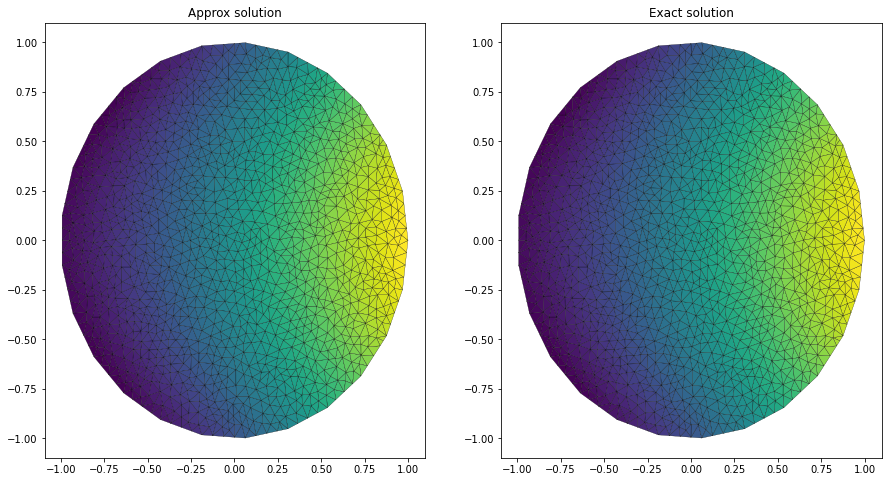

In [4]:
plotter.create_plot(mesh, u, h, (15, 8))